# Car Accident detection using ResNet50V2

### Could not fined the desired resnet18 API so using a much better architecture which is ResNet50V2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [3]:
!pip install tensorflow-addons

     |████████████████████████████████| 706kB 5.5MB/s 


In [9]:
# Import the required libraries

import os
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Taking Dataset from Google Drive

In [5]:
# Store the base directory path

base_dir = os.path.join("/content/drive/MyDrive/Accident data/")
print('Base directory --> ', os.listdir(base_dir))

Base directory -->  ['test', 'train', 'val']


# Train, Test and Validation path

In [6]:
# Store the train, validation and test directory paths

train_dir = os.path.join(base_dir + "train/")
print("Train Directory --> ", os.listdir(train_dir))

validation_dir = os.path.join(base_dir + "val/")
print("Validation Directory --> ", os.listdir(validation_dir))

test_dir = os.path.join(base_dir + "test/")
print("Test Directory --> ", os.listdir(test_dir))

Train Directory -->  ['Accident', 'Non Accident']
Validation Directory -->  ['Non Accident', 'Accident']
Test Directory -->  ['Accident', 'Non Accident']


# Samples of Accident Images

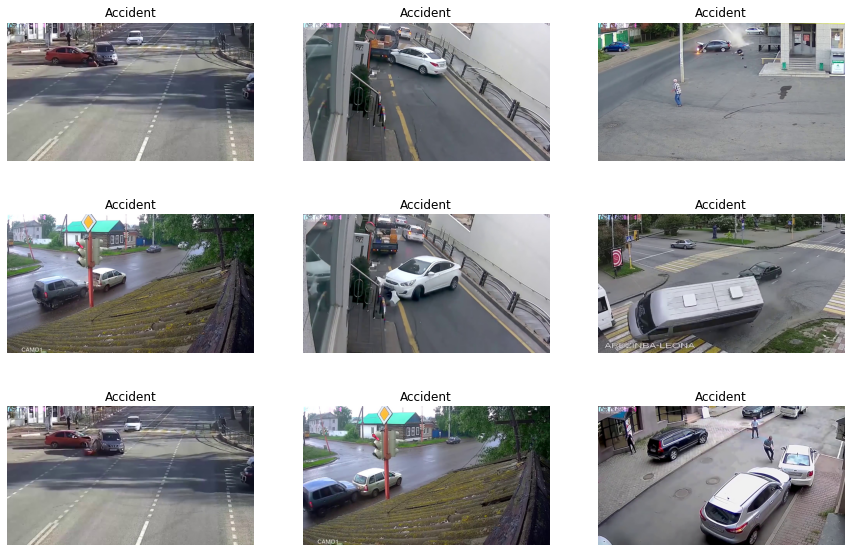

In [7]:
# Plot each type of image in the dataset

fig, ax = plt.subplots(3, 3, figsize=(15, 10))

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[0,0].imshow(accident_image)
ax[0,0].set_title("Accident")
ax[0,0].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[0,1].imshow(accident_image)
ax[0,1].set_title("Accident")
ax[0,1].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[0,2].imshow(accident_image)
ax[0,2].set_title("Accident")
ax[0,2].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[1,0].imshow(accident_image)
ax[1,0].set_title("Accident")
ax[1,0].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[1,1].imshow(accident_image)
ax[1,1].set_title("Accident")
ax[1,1].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[1,2].imshow(accident_image)
ax[1,2].set_title("Accident")
ax[1,2].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[2,0].imshow(accident_image)
ax[2,0].set_title("Accident")
ax[2,0].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[2,1].imshow(accident_image)
ax[2,1].set_title("Accident")
ax[2,1].axis("Off")

accident = random.choice(os.listdir(train_dir + "Accident"))
accident_image = load_img(train_dir + "Accident/" + accident)
ax[2,2].imshow(accident_image)
ax[2,2].set_title("Accident")
ax[2,2].axis("Off")
plt.show()

# Sample of Normal Images

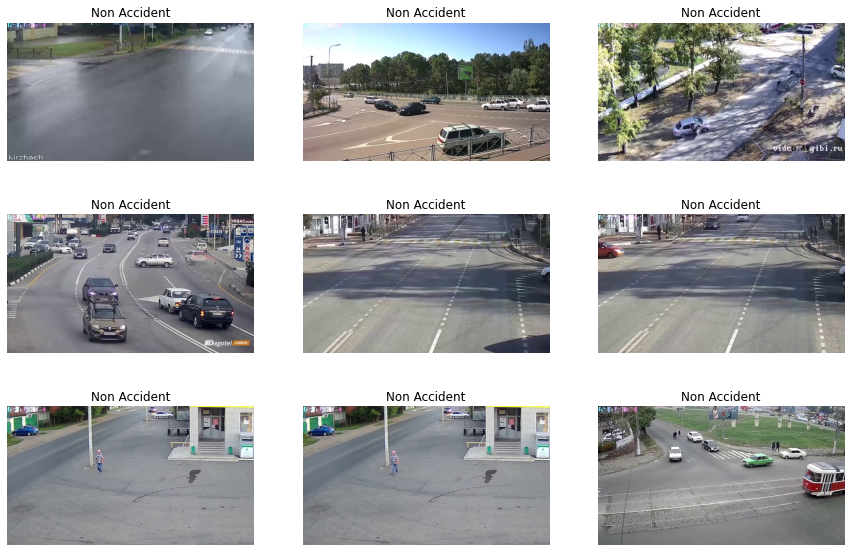

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[0,0].imshow(non_accident_image)
ax[0,0].set_title("Non Accident")
ax[0,0].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[0,1].imshow(non_accident_image)
ax[0,1].set_title("Non Accident")
ax[0,1].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[0,2].imshow(non_accident_image)
ax[0,2].set_title("Non Accident")
ax[0,2].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[1,0].imshow(non_accident_image)
ax[1,0].set_title("Non Accident")
ax[1,0].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[1,1].imshow(non_accident_image)
ax[1,1].set_title("Non Accident")
ax[1,1].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[1,2].imshow(non_accident_image)
ax[1,2].set_title("Non Accident")
ax[1,2].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[2,0].imshow(non_accident_image)
ax[2,0].set_title("Non Accident")
ax[2,0].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[2,1].imshow(non_accident_image)
ax[2,1].set_title("Non Accident")
ax[2,1].axis("Off")

non_accident = random.choice(os.listdir(train_dir + "Non Accident"))
non_accident_image = load_img(train_dir + "Non Accident/" + non_accident)
ax[2,2].imshow(non_accident_image)
ax[2,2].set_title("Non Accident")
ax[2,2].axis("Off")

plt.show()

# Building ResNet50V2 Architecture

In [9]:
from tensorflow.keras.applications import ResNet50V2

backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

94674944/94668760 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,566,849
Trainable params: 23,521,409
Non-trainable params: 45,440
_________________________________________________________________


# Choosing Accuracy matrix

In [10]:
metrics_list = ['accuracy']

# Compiling with Adam Optimizer and Loss function is Binary Crossentropy

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = metrics_list)

# Train Data Generation

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), class_mode = 'binary', batch_size = 100)

Found 791 images belonging to 2 classes.


# Validation Data Generation

In [13]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150, 150), class_mode = 'binary', batch_size = 16)

Found 98 images belonging to 2 classes.


# Test Data Generation

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), class_mode = 'binary', batch_size = 44)

Found 100 images belonging to 2 classes.


# Fitting the Dataset into the Model

In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = (791/100),
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = (98/16),
    verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
7/7 [==============================] - 346s 38s/step - loss: 0.8397 - accuracy: 0.5653 - val_loss: 3.6773 - val_accuracy: 0.5306
Epoch 2/100
7/7 [==============================] - 14s 2s/step - loss: 0.6426 - accuracy: 0.6194 - val_loss: 86.7384 - val_accuracy: 0.4694
Epoch 3/100
7/7 [==============================] - 14s 2s/step - loss: 0.5718 - accuracy: 0.6506 - val_loss: 38.6515 - val_accuracy: 0.5204
Epoch 4/100
7/7 [==============================] - 14s 2s/step - loss: 0.4999 - accuracy: 0.6891 - val_loss: 71.9571 - val_accuracy: 0.5306
Epoch 5/100
7/7 [==============================] - 14s 2s/step - loss: 0.4325 - accuracy: 0.7615 - val_loss: 66.0000 - val_accuracy: 0.5102
Epoch 6/100
7/7 [==============================] - 14s 2s/step - loss: 0.3822 - accuracy: 0.8195 - val_loss: 61.5441 - val_accuracy: 0.4694
Epoch 7/100
7/7 [==============================] - 14s 2s/step - loss: 0.2978 - accuracy: 0.8775 - val_loss: 79.7860 - val_accuracy: 0.4694
Epoch 8/100
7/7 [==

# Storing the Model into Desktop

In [16]:
model.save("model_brain_Resnet50V2.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting Accuracy and Val_Accuracy

In [3]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=acc, name='Accuracy',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(y=val_acc, name = 'Validation Accuracy',
                         line=dict(color='firebrick', width=5)))

# Plotting Loss and Val_Loss

In [4]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=loss, name='Loss',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(y=val_loss, name = 'Validation Loss',
                         line=dict(color='firebrick', width=5)))

# Prediction For Test Set

In [20]:
model.predict(test_generator, steps = int(100/44))

array([[1.8795419e-06],
       [9.9999535e-01],
       [1.3746018e-02],
       [9.9422401e-01],
       [9.9999452e-01],
       [9.9999440e-01],
       [1.6727312e-06],
       [9.9997842e-01],
       [9.9998283e-01],
       [5.6805085e-09],
       [1.7589167e-06],
       [9.9763358e-01],
       [1.8206637e-06],
       [9.9998975e-01],
       [9.9998474e-01],
       [9.8910475e-01],
       [8.4142411e-01],
       [3.9544416e-06],
       [9.9999356e-01],
       [9.9999022e-01],
       [2.9821042e-06],
       [9.9998128e-01],
       [9.9999475e-01],
       [9.7844895e-06],
       [1.1751298e-08],
       [9.9944133e-01],
       [8.8584620e-06],
       [2.4818117e-03],
       [9.9998963e-01],
       [9.9900985e-01],
       [5.8160963e-06],
       [9.9999702e-01],
       [1.0899533e-05],
       [9.9999833e-01],
       [1.4774784e-05],
       [1.5155472e-05],
       [9.9952328e-01],
       [5.1153338e-06],
       [6.0148814e-06],
       [1.9091865e-05],
       [9.9999583e-01],
       [9.999452

# Model Evaluation

In [21]:
m = model.evaluate(test_generator)
print(m)

3/3 [==============================] - 2s 534ms/step - loss: 0.1544 - accuracy: 0.9500
[0.15440459549427032, 0.949999988079071]


# Model Accuracy

In [22]:
print('Accuracy : ',m[1])
print('Loss : ',m[0])

Accuracy :  0.949999988079071
Loss :  0.15440459549427032


# This Model can Successfully Classify Car Accident with an Accuracy of 95%

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
train_generator = lda.fit_transform(train_generator,test_generator)
validation_generator = lda.transform(validation_generator)
test_generator = lda.transform(test_generator)

# I have not enough time to do discriminative analysis but I am attaching the code, just needed to run the whole model and epoch again and will get the desire output

In [2]:
val_acc = [0.5306122303009033,
 0.4693877696990967,
 0.5204081535339355,
 0.5306122303009033,
 0.5102040767669678,
 0.4693877696990967,
 0.4693877696990967,
 0.6530612111091614,
 0.4693877696990967,
 0.5510203838348389,
 0.5918367505073547,
 0.6632652878761292,
 0.6836734414100647,
 0.5918367505073547,
 0.6122449040412903,
 0.4693877696990967,
 0.6632652878761292,
 0.8571428656578064,
 0.8061224222183228,
 0.8775510191917419,
 0.8469387888908386,
 0.8163265585899353,
 0.8469387888908386,
 0.8979591727256775,
 0.8877550959587097,
 0.7653061151504517,
 0.8673469424247742,
 0.8673469424247742,
 0.8673469424247742,
 0.8979591727256775,
 0.9081632494926453,
 0.9081632494926453,
 0.9081632494926453,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.9081632494926453,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.918367326259613,
 0.9081632494926453,
 0.9387755393981934,
 0.9489796161651611,
 0.9489796161651611,
 0.9489796161651611,
 0.9489796161651611,
 0.9489796161651611,
 0.9489796161651611,
 0.9489796161651611,
 0.9489796161651611,
 0.9387755393981934,
 0.9387755393981934,
 0.9387755393981934,
 0.9387755393981934,
 0.9387755393981934,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808,
 0.9285714030265808]
acc = [0.6017699241638184,
 0.6321112513542175,
 0.6624525785446167,
 0.6965866088867188,
 0.7686472535133362,
 0.8179519772529602,
 0.8836915493011475,
 0.9178255200386047,
 0.9165613055229187,
 0.9266750812530518,
 0.9481669068336487,
 0.9633375406265259,
 0.9266750812530518,
 0.9544879794120789,
 0.9582806825637817,
 0.9620733261108398,
 0.9772440195083618,
 0.9494311213493347,
 0.9506953358650208,
 0.9721871018409729,
 0.9772440195083618,
 0.984829306602478,
 0.9785082340240479,
 0.982300877571106,
 0.9886220097541809,
 0.991150438785553,
 0.992414653301239,
 0.992414653301239,
 0.9949430823326111,
 0.993678867816925,
 0.993678867816925,
 0.993678867816925,
 0.993678867816925,
 0.993678867816925,
 0.993678867816925,
 0.9949430823326111,
 0.993678867816925,
 0.993678867816925,
 0.9949430823326111,
 0.9949430823326111,
 0.991150438785553,
 0.9949430823326111,
 0.9962073564529419,
 0.9962073564529419,
 0.9949430823326111,
 0.9949430823326111,
 0.992414653301239,
 0.993678867816925,
 0.9949430823326111,
 0.9949430823326111,
 0.9949430823326111,
 0.9949430823326111,
 0.9949430823326111,
 0.993678867816925,
 0.993678867816925,
 0.993678867816925,
 0.992414653301239,
 0.9949430823326111,
 0.992414653301239,
 0.9949430823326111,
 0.992414653301239,
 0.993678867816925,
 0.993678867816925,
 0.9962073564529419,
 0.9962073564529419,
 0.9962073564529419,
 0.992414653301239,
 0.9949430823326111,
 0.9962073564529419,
 0.9949430823326111,
 0.993678867816925,
 0.9949430823326111,
 0.9949430823326111,
 0.9949430823326111,
 0.9949430823326111,
 0.9949430823326111,
 0.993678867816925,
 0.9949430823326111,
 0.9949430823326111,
 0.9949430823326111,
 0.9949430823326111,
 0.993678867816925,
 0.993678867816925,
 0.9962073564529419,
 0.993678867816925,
 0.9949430823326111,
 0.992414653301239,
 0.993678867816925,
 0.9949430823326111,
 0.9962073564529419,
 0.9949430823326111,
 0.991150438785553,
 0.9949430823326111,
 0.992414653301239,
 0.9949430823326111,
 0.9949430823326111,
 0.993678867816925,
 0.9949430823326111,
 0.9962073564529419,
 0.9962073564529419]

loss = [0.7941308617591858,
 0.6266469955444336,
 0.5604426860809326,
 0.49288061261177063,
 0.4306594431400299,
 0.38170066475868225,
 0.27784883975982666,
 0.191657155752182,
 0.19053184986114502,
 0.1795027107000351,
 0.13040009140968323,
 0.11573328822851181,
 0.17608529329299927,
 0.10956230759620667,
 0.09667044132947922,
 0.09314262866973877,
 0.06285765022039413,
 0.14485140144824982,
 0.08799590915441513,
 0.07411395758390427,
 0.0583212748169899,
 0.039678167551755905,
 0.06614401191473007,
 0.06538267433643341,
 0.02694173902273178,
 0.021369140595197678,
 0.01562589593231678,
 0.015459859743714333,
 0.011546515859663486,
 0.01001821830868721,
 0.008502179756760597,
 0.007489464711397886,
 0.0078010051511228085,
 0.007454524748027325,
 0.007428153418004513,
 0.007286082021892071,
 0.0073335617780685425,
 0.007190277334302664,
 0.007218991406261921,
 0.007163524627685547,
 0.007269232999533415,
 0.007296053227037191,
 0.007108154706656933,
 0.007159513887017965,
 0.007147093303501606,
 0.007151139434427023,
 0.007104335818439722,
 0.0071067214012146,
 0.00705837644636631,
 0.007060840260237455,
 0.0071425288915634155,
 0.007131463382393122,
 0.007089008577167988,
 0.007065922021865845,
 0.007096526212990284,
 0.007090806495398283,
 0.007076643873006105,
 0.007038085721433163,
 0.007087957579642534,
 0.007039278279989958,
 0.007068222388625145,
 0.007098006084561348,
 0.007071756292134523,
 0.00704212486743927,
 0.007020315155386925,
 0.0070162080228328705,
 0.007066893856972456,
 0.007067320868372917,
 0.007056920323520899,
 0.007045827340334654,
 0.0069510661996901035,
 0.007165161427110434,
 0.007057182490825653,
 0.006997901946306229,
 0.006948044989258051,
 0.006918442435562611,
 0.008001068606972694,
 0.0074096014723181725,
 0.007043449208140373,
 0.007041621953248978,
 0.0070273419842123985,
 0.007039354648441076,
 0.00707604642957449,
 0.00705601554363966,
 0.007124495692551136,
 0.007077839225530624,
 0.007063321769237518,
 0.007036183960735798,
 0.007061138283461332,
 0.006957817357033491,
 0.007041914388537407,
 0.006995049770921469,
 0.006980112288147211,
 0.006996423006057739,
 0.0069600436836481094,
 0.006969893351197243,
 0.007041059900075197,
 0.007013658527284861,
 0.006988071836531162,
 0.006969533860683441]

val_loss = [3.6772983074188232,
 86.73837280273438,
 38.651451110839844,
 71.95706939697266,
 66.00003814697266,
 61.54414367675781,
 79.78595733642578,
 11.882404327392578,
 86.3137435913086,
 21.596975326538086,
 7.804102897644043,
 1.6011099815368652,
 3.51259183883667,
 6.584038734436035,
 8.60476016998291,
 38.736576080322266,
 10.469623565673828,
 1.0463330745697021,
 0.8483060598373413,
 0.5601934194564819,
 0.9601986408233643,
 0.8124476671218872,
 0.8147436380386353,
 0.5900622010231018,
 0.5279731154441833,
 1.2920247316360474,
 0.7823052406311035,
 0.7385374307632446,
 0.7730036377906799,
 0.6685104966163635,
 0.5105936527252197,
 0.43703386187553406,
 0.42773377895355225,
 0.41554030776023865,
 0.4129500985145569,
 0.4100216031074524,
 0.40466955304145813,
 0.3977292776107788,
 0.3893876075744629,
 0.3869747519493103,
 0.38193321228027344,
 0.38088127970695496,
 0.37601640820503235,
 0.37384697794914246,
 0.371085524559021,
 0.37005308270454407,
 0.3653741180896759,
 0.36011895537376404,
 0.35653814673423767,
 0.3552451729774475,
 0.35437992215156555,
 0.35492995381355286,
 0.35440295934677124,
 0.35151299834251404,
 0.35028696060180664,
 0.3477139472961426,
 0.34645166993141174,
 0.34373393654823303,
 0.3408878743648529,
 0.3394288420677185,
 0.33827099204063416,
 0.33795708417892456,
 0.3384632170200348,
 0.3418814539909363,
 0.33979475498199463,
 0.3396426737308502,
 0.3388754427433014,
 0.3385086953639984,
 0.34177204966545105,
 0.3410300016403198,
 0.33919307589530945,
 0.3383799195289612,
 0.3467082977294922,
 0.34416136145591736,
 0.3394450843334198,
 0.3445800840854645,
 0.3261691927909851,
 0.32561904191970825,
 0.3268187344074249,
 0.3266696631908417,
 0.3247770369052887,
 0.32369691133499146,
 0.32260286808013916,
 0.32212990522384644,
 0.3224259912967682,
 0.32290101051330566,
 0.32387182116508484,
 0.3243299126625061,
 0.3245319724082947,
 0.3241424858570099,
 0.3240613043308258,
 0.32457226514816284,
 0.3250064551830292,
 0.32647573947906494,
 0.32744207978248596,
 0.32959362864494324,
 0.3320876955986023,
 0.33452147245407104,
 0.33580222725868225,
 0.3378986418247223]